In [2]:
import pandas as pd
import matplotlib
import time
import matplotlib.pyplot as plt
import numpy as np
import plotnine as p9
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import scipy.stats as stats

In [3]:
df=pd.read_csv('folder/各点多年平均_有经纬LAI.csv')

In [4]:
df

,Unnamed: 0,H_F_MDS,type,name,valid,LE_F_MDS,P_F,TA_F,SW_OUT,P_SUM,VPD_F,LW_IN_F,SW_IN_F,albedo,b,latitude,longitude,longitude_new,IGBP,LAI
0,0,68.095032,MF_S,AR-SLu,0.801865,39.510745,0.020445,19.572791,NaN,23.146222,13.529252,318.662882,207.502198,NaN,2.084899,-33.464800,-66.459800,293.540200,MF,0.640604
1,0,-18.943289,ENF_S,AR-Vir,0.808693,82.198975,0.082782,21.431613,NaN,97.251417,9.126853,365.041162,161.715166,NaN,-0.235940,-28.239500,-56.188600,303.811400,ENF,2.414140
2,0,-3.286018,GRA,AT-Neu,0.809954,16.211796,0.042371,5.827517,56.022692,49.006782,2.215954,288.201762,81.199449,0.364724,-1.561054,47.116670,11.317500,11.317500,GRA,1.511286
3,0,57.910279,WSA_S,AU-Ade,0.759979,50.406914,0.082257,26.914328,56.529799,92.218069,15.135291,403.007267,217.090602,0.139399,1.507399,-13.076900,131.117800,131.117800,WSA,1.153943
4,0,80.377196,SAV_S,AU-ASM,0.733468,21.789513,0.022501,22.446910,63.676331,25.369881,20.150878,348.683547,239.376965,0.133624,10.096540,-22.283000,133.249000,133.249000,SAV,0.338191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,26.092398,ENF,US-Wi9,0.809565,24.793146,0.042611,3.592561,NaN,50.403250,2.624575,289.848535,114.845075,NaN,1.016907,46.738514,-91.074644,268.925356,ENF,1.752076
201,0,46.103491,GRA,US-Wkg,0.809871,15.500204,0.016670,17.012913,78.566354,19.093944,14.512146,301.841748,203.219174,0.190489,4.397425,31.736500,-109.941900,250.058100,GRA,0.294075
202,0,7.035685,WET,US-WPT,0.809934,43.061990,0.051723,10.735540,39.918884,60.106056,3.883991,343.312107,113.156470,0.173277,0.200350,41.464639,-82.996157,277.003843,WET,0.759704
203,0,41.667899,SAV_S,ZA-Kru,0.809954,31.513582,0.027485,21.452664,48.637975,33.633255,10.202385,374.528566,160.116744,0.150566,2.460642,-25.019700,31.496900,31.496900,SAV,1.000877


In [5]:
df.dtypes

Unnamed: 0         int64
H_F_MDS          float64
type              object
name              object
valid            float64
LE_F_MDS         float64
P_F              float64
TA_F             float64
SW_OUT           float64
P_SUM            float64
VPD_F            float64
LW_IN_F          float64
SW_IN_F          float64
albedo           float64
b                float64
latitude         float64
longitude        float64
longitude_new    float64
IGBP              object
LAI              float64
dtype: object

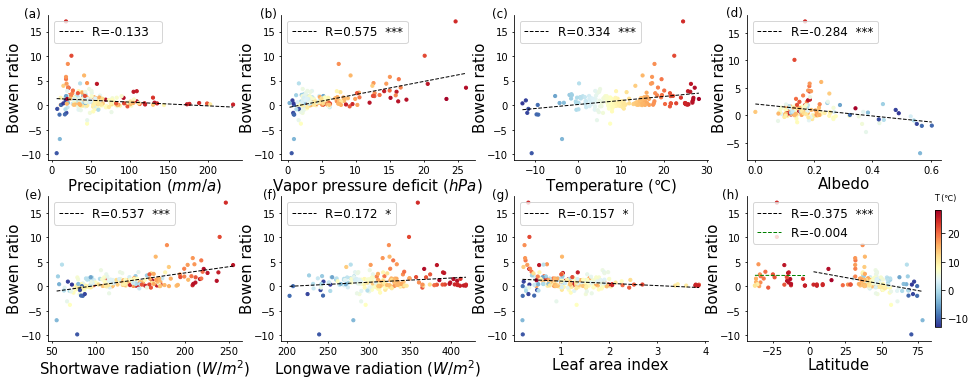

In [6]:
#Bowen ratio与影响因素
fig, axes = plt.subplots(2,4,figsize=(16,6)) 
plt.subplots_adjust(hspace=0.25)
        


# Decomposition method 
def plot_fitting(df, x_txt, y_txt, ax, order=1,lw=1):
    parameter=np.polyfit(df[x_txt],df[y_txt],order)
    p = np.poly1d(parameter)
    y= parameter[0] * df[x_txt]  + parameter[1] 
    xp = np.linspace(df[x_txt].min(), df[x_txt].max(), 50)
    correlation = df[x_txt].corr(df[y_txt])  #相关系数
    correlation=round(correlation,3)
    c=str(correlation)
    
    p_=stats.pearsonr(df[x_txt], df[y_txt])
    p_value=p_[1]
    s=""
    if p_value <0.05 and (p_value > 0.01 or p_value == 0.01):
        s="*"
    elif p_value < 0.01 and (p_value > 0.001 or p_value == 0.001):
        s="**"
    elif p_value <0.001:
        s="***"
    #p_=stats.pearsonr(df[x_txt],df[y_txt]) #计算出来是2个值，第二个才是P_value
    #p_value=p_[1]
    #p_value=round(p_value,3)
    #p_value=str(p_value)
    ax.plot(xp, p(xp), '--',color='black',lw=lw,label="R="+c+"  "+s)
    return c

name=['P_SUM','VPD_F','TA_F','albedo','SW_IN_F','LW_IN_F','LAI','latitude']
label=['Precipitation ($mm/a$)','Vapor pressure deficit ($hPa$) ','Temperature ($℃$)','Albedo','Shortwave radiation ($W/m^2$)','Longwave radiation ($W/m^2$)','Leaf area index','Latitude']
for i in range(2):
    for j in range(3):
        plot_fitting(df,name[i*4+j],'b',axes[i][j],order=1)
        a=axes[i][j].scatter( df[name[i*4+j]],df['b'], c=df['TA_F'],s=10,alpha=1,cmap="RdYlBu_r")
        axes[i][j].tick_params(labelsize=10,length=4)
        axes[i][j].legend(loc=2,fontsize=12)
        axes[i][j].set_ylabel("Bowen ratio",fontsize=15,labelpad=-1)
        axes[i][j].set_xlabel(str(label[i*4+j]),fontsize=15,labelpad=0.6)
        axes[i][j].tick_params(labelsize=10,length=2)
        axes[i][j].spines['top'].set_visible(False)
        axes[i][j].spines['right'].set_visible(False)


df_a=df.dropna()
plot_fitting(df_a,'albedo','b',axes[0][3],order=1)
a=axes[0][3].scatter( df['albedo'],df['b'], c=df['TA_F'],s=10,alpha=1,cmap="RdYlBu_r")
axes[0][3].tick_params(labelsize=10,length=4)
axes[0][3].legend(loc=2,fontsize=12)
axes[0][3].set_ylabel("Bowen ratio",fontsize=15,labelpad=-1)
axes[0][3].set_xlabel('Albedo',fontsize=15,labelpad=0.6)
axes[0][3].tick_params(labelsize=10,length=2)
axes[0][3].spines['top'].set_visible(False)
axes[0][3].spines['right'].set_visible(False)
        

#为了让南半球拟合的线段颜色不同
def plot_fitting1(df, x_txt, y_txt, ax, order=1,lw=1):
    parameter=np.polyfit(df[x_txt], df[y_txt], order)
    p = np.poly1d(parameter)
    y= parameter[0] * df[x_txt]  + parameter[1] 
    xp = np.linspace(df[x_txt].min(), df[x_txt].max(), 50)
    correlation = df[x_txt].corr(df[y_txt])  #相关系数
    correlation=round(correlation,3)
    c=str(correlation)
    
    p_=stats.pearsonr(df[x_txt], df[y_txt])
    p_value=p_[1]
    s=""
    if p_value <0.05 and (p_value > 0.01 or p_value == 0.01):
        s="*"
    elif p_value < 0.01 and (p_value > 0.001 or p_value == 0.001):
        s="**"
    elif p_value <0.001:
        s="***"
    #p_=stats.pearsonr(df[x_txt],df[y_txt]) #计算出来是2个值，第二个才是P_value
    #p_value=p_[1]
    #p_value=round(p_value,3)
    #p_value=str(p_value)
    ax.plot(xp, p(xp), '--',color='green',lw=lw,label="R="+c+"  "+s)
    return c


#纬度分为南北拟合 
df_1=df[df['latitude']>0]
plot_fitting(df_1,'latitude','b',axes[1][3],order=1)
df_2=df[df['latitude']<0]
plot_fitting1(df_2,'latitude','b',axes[1][3],order=1)
a=axes[1][3].scatter( df['latitude'],df['b'], c=df['TA_F'],s=10,alpha=1,cmap="RdYlBu_r")
axes[1][3].tick_params(labelsize=10,length=4)
axes[1][3].legend(loc=2,fontsize=12)
axes[1][3].set_ylabel("Bowen ratio",fontsize=15,labelpad=-1)
axes[1][3].set_xlabel('Latitude',fontsize=15,labelpad=0.6)
axes[1][3].tick_params(labelsize=10,length=2)
axes[1][3].spines['top'].set_visible(False)
axes[1][3].spines['right'].set_visible(False)  
    

axes[0][0].text(-36,18,'(a)',fontsize=12)
axes[0][1].text(-4,18,'(b)',fontsize=12)
axes[0][2].text(-20,18,'(c)',fontsize=12)
axes[0][3].text(-0.1,18,'(d)',fontsize=12)
axes[1][0].text(20,18,'(e)',fontsize=12)
axes[1][1].text(170,18,'(f)',fontsize=12)
axes[1][2].text(-0.45,18,'(g)',fontsize=12)
axes[1][3].text(-60,18,'(h)',fontsize=12)

axes[1][3].text(86,17.5,'T (℃)',color='k',fontsize=8)

plt.colorbar(a,fraction=0.03,pad=0.02)
plt.savefig("folder/图/6.影响因子b.jpg",dpi=100)

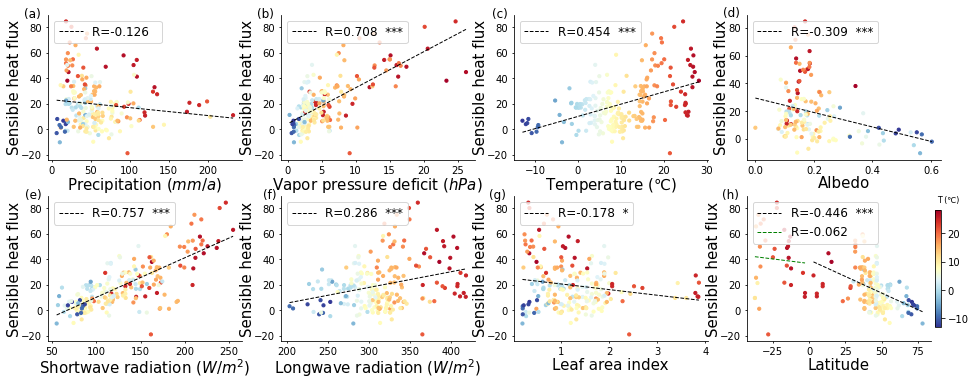

In [7]:
#感热与影响因素
fig, axes = plt.subplots(2,4,figsize=(16,6)) 
plt.subplots_adjust(hspace=0.25)
        


# Decomposition method 
def plot_fitting(df, x_txt, y_txt, ax, order=1,lw=1):
    parameter=np.polyfit(df[x_txt], df[y_txt],order)
    p = np.poly1d(parameter)
    y= parameter[0] * df[x_txt]  + parameter[1] 
    xp = np.linspace(df[x_txt].min(), df[x_txt].max(), 50)
    correlation = df[x_txt].corr(df[y_txt])  #相关系数
    correlation=round(correlation,3)
    c=str(correlation)
    
    p_=stats.pearsonr(df[x_txt], df[y_txt])
    p_value=p_[1]
    s=""
    if p_value <0.05 and (p_value > 0.01 or p_value == 0.01):
        s="*"
    elif p_value < 0.01 and (p_value > 0.001 or p_value == 0.001):
        s="**"
    elif p_value <0.001:
        s="***"
    #p_=stats.pearsonr(df[x_txt],df[y_txt]) #计算出来是2个值，第二个才是P_value
    #p_value=p_[1]
    #p_value=round(p_value,3)
    #p_value=str(p_value)
    ax.plot(xp, p(xp), '--',color='black',lw=lw,label="R="+c+"  "+s)
    return c

name=['P_SUM','VPD_F','TA_F','albedo','SW_IN_F','LW_IN_F','LAI','latitude']
label=['Precipitation ($mm/a$)','Vapor pressure deficit ($hPa$) ','Temperature ($℃$)','Albedo','Shortwave radiation ($W/m^2$)','Longwave radiation ($W/m^2$)','Leaf area index','Latitude']
for i in range(2):
    for j in range(3):
        plot_fitting(df,name[i*4+j],'H_F_MDS',axes[i][j],order=1)
        a=axes[i][j].scatter( df[name[i*4+j]],df['H_F_MDS'], c=df['TA_F'],s=10,alpha=1,cmap="RdYlBu_r")
        axes[i][j].tick_params(labelsize=10,length=4)
        axes[i][j].legend(loc=2,fontsize=12)
        axes[i][j].set_ylabel("Sensible heat flux",fontsize=15,labelpad=-1)
        axes[i][j].set_xlabel(str(label[i*4+j]),fontsize=15,labelpad=0.6)
        axes[i][j].tick_params(labelsize=10,length=2)
        axes[i][j].spines['top'].set_visible(False)
        axes[i][j].spines['right'].set_visible(False)


df_a=df.dropna()
plot_fitting(df_a,'albedo','H_F_MDS',axes[0][3],order=1)
a=axes[0][3].scatter( df['albedo'],df['H_F_MDS'], c=df['TA_F'],s=10,alpha=1,cmap="RdYlBu_r")
axes[0][3].tick_params(labelsize=10,length=4)
axes[0][3].legend(loc=2,fontsize=12)
axes[0][3].set_ylabel("Sensible heat flux",fontsize=15,labelpad=-1)
axes[0][3].set_xlabel('Albedo',fontsize=15,labelpad=0.6)
axes[0][3].tick_params(labelsize=10,length=2)
axes[0][3].spines['top'].set_visible(False)
axes[0][3].spines['right'].set_visible(False)
        

#为了让南半球拟合的线段颜色不同
def plot_fitting1(df, x_txt, y_txt, ax, order=1,lw=1):
    parameter=np.polyfit(df[x_txt], df[y_txt], order)
    p = np.poly1d(parameter)
    y= parameter[0] * df[x_txt]  + parameter[1] 
    xp = np.linspace(df[x_txt].min(), df[x_txt].max(), 50)
    correlation = df[x_txt].corr(df[y_txt])  #相关系数
    correlation=round(correlation,3)
    c=str(correlation)
    
    p_=stats.pearsonr(df[x_txt], df[y_txt])
    p_value=p_[1]
    s=""
    if p_value <0.05 and (p_value > 0.01 or p_value == 0.01):
        s="*"
    elif p_value < 0.01 and (p_value > 0.001 or p_value == 0.001):
        s="**"
    elif p_value <0.001:
        s="***"
    #p_=stats.pearsonr(df[x_txt],df[y_txt]) #计算出来是2个值，第二个才是P_value
    #p_value=p_[1]
    #p_value=round(p_value,3)
    #p_value=str(p_value)
    ax.plot(xp, p(xp), '--',color='green',lw=lw,label="R="+c+"  "+s)
    return c


#纬度分为南北拟合 
df_1=df[df['latitude']>0]
plot_fitting(df_1,'latitude','H_F_MDS',axes[1][3],order=1)
df_2=df[df['latitude']<0]
plot_fitting1(df_2,'latitude','H_F_MDS',axes[1][3],order=1)
a=axes[1][3].scatter( df['latitude'],df['H_F_MDS'], c=df['TA_F'],s=10,alpha=1,cmap="RdYlBu_r")
axes[1][3].tick_params(labelsize=10,length=4)
axes[1][3].legend(loc=2,fontsize=12)
axes[1][3].set_ylabel("Sensible heat flux",fontsize=15,labelpad=-1)
axes[1][3].set_xlabel('Latitude',fontsize=15,labelpad=0.6)
axes[1][3].tick_params(labelsize=10,length=2)
axes[1][3].spines['top'].set_visible(False)
axes[1][3].spines['right'].set_visible(False)  
    

axes[0][0].text(-35,88,'(a)',fontsize=12)
axes[0][1].text(-4.5,88,'(b)',fontsize=12)
axes[0][2].text(-20,88,'(c)',fontsize=12)
axes[0][3].text(-0.11,88,'(d)',fontsize=12)

axes[1][0].text(20,88,'(e)',fontsize=12)
axes[1][1].text(170,88,'(f)',fontsize=12)
axes[1][2].text(-0.5,88,'(g)',fontsize=12)
axes[1][3].text(-60,88,'(h)',fontsize=12)


axes[1][3].text(88,85,'T (℃)',color='k',fontsize=8)

plt.colorbar(a,fraction=0.03,pad=0.02)
plt.savefig("folder/图/补充图2.影响因子H.jpg",dpi=100)

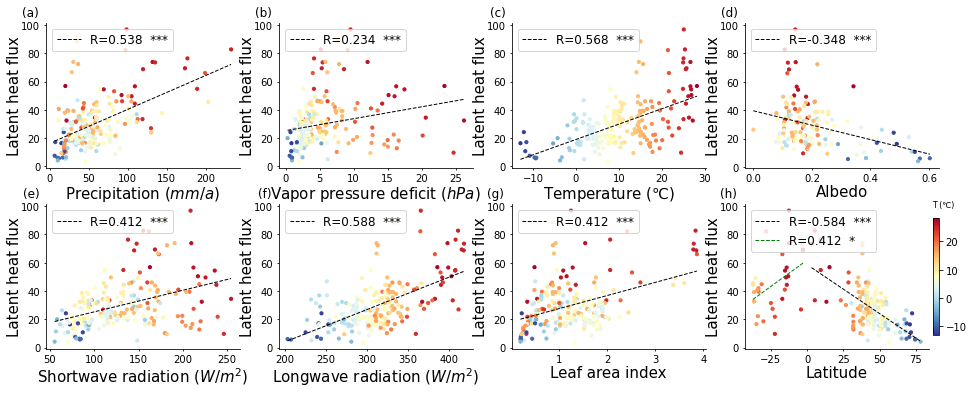

In [8]:
#潜热与影响因素
fig, axes = plt.subplots(2,4,figsize=(16,6)) 
plt.subplots_adjust(hspace=0.25)
        


# Decomposition method 
def plot_fitting(df, x_txt, y_txt, ax, order=1,lw=1):
    parameter=np.polyfit(df[x_txt], df[y_txt], order)
    p = np.poly1d(parameter)
    y= parameter[0] * df[x_txt]  + parameter[1] 
    xp = np.linspace(df[x_txt].min(), df[x_txt].max(), 50)
    correlation = df[x_txt].corr(df[y_txt])  #相关系数
    correlation=round(correlation,3)
    c=str(correlation)
    
    p_=stats.pearsonr(df[x_txt], df[y_txt])
    p_value=p_[1]
    s=""
    if p_value <0.05 and (p_value > 0.01 or p_value == 0.01):
        s="*"
    elif p_value < 0.01 and (p_value > 0.001 or p_value == 0.001):
        s="**"
    elif p_value <0.001:
        s="***"
    #p_=stats.pearsonr(df[x_txt],df[y_txt]) #计算出来是2个值，第二个才是P_value
    #p_value=p_[1]
    #p_value=round(p_value,3)
    #p_value=str(p_value)
    ax.plot(xp, p(xp), '--',color='black',lw=lw,label="R="+c+"  "+s)
    return c

name=['P_SUM','VPD_F','TA_F','albedo','SW_IN_F','LW_IN_F','LAI','latitude']
label=['Precipitation ($mm/a$)','Vapor pressure deficit ($hPa$) ','Temperature ($℃$)','Albedo','Shortwave radiation ($W/m^2$)','Longwave radiation ($W/m^2$)','Leaf area index','Latitude']
for i in range(2):
    for j in range(3):
        plot_fitting(df,name[i*4+j],'LE_F_MDS',axes[i][j],order=1)
        a=axes[i][j].scatter( df[name[i*4+j]],df['LE_F_MDS'], c=df['TA_F'],s=10,alpha=1,cmap="RdYlBu_r")
        axes[i][j].tick_params(labelsize=10,length=4)
        axes[i][j].legend(loc=2,fontsize=12)
        axes[i][j].set_ylabel("Latent heat flux",fontsize=15,labelpad=-1)
        axes[i][j].set_xlabel(str(label[i*4+j]),fontsize=15,labelpad=0.6)
        axes[i][j].tick_params(labelsize=10,length=2)
        axes[i][j].spines['top'].set_visible(False)
        axes[i][j].spines['right'].set_visible(False)


df_a=df.dropna()
plot_fitting(df_a,'albedo','LE_F_MDS',axes[0][3],order=1)
a=axes[0][3].scatter( df['albedo'],df['LE_F_MDS'], c=df['TA_F'],s=10,alpha=1,cmap="RdYlBu_r")
axes[0][3].tick_params(labelsize=10,length=4)
axes[0][3].legend(loc=2,fontsize=12)
axes[0][3].set_ylabel("Latent heat flux",fontsize=15,labelpad=-1)
axes[0][3].set_xlabel('Albedo',fontsize=15,labelpad=0.6)
axes[0][3].tick_params(labelsize=10,length=2)
axes[0][3].spines['top'].set_visible(False)
axes[0][3].spines['right'].set_visible(False)
        

#为了让南半球拟合的线段颜色不同
def plot_fitting1(df, x_txt, y_txt, ax, order=1,lw=1):
    parameter=np.polyfit(df[x_txt], df[y_txt], order)
    p = np.poly1d(parameter)
    y= parameter[0] * df[x_txt]  + parameter[1] 
    xp = np.linspace(df[x_txt].min(), df[x_txt].max(), 50)
    correlation = df[x_txt].corr(df[y_txt])  #相关系数
    correlation=round(correlation,3)
    c=str(correlation)
    
    p_=stats.pearsonr(df[x_txt], df[y_txt])
    p_value=p_[1]
    s=""
    if p_value <0.05 and (p_value > 0.01 or p_value == 0.01):
        s="*"
    elif p_value < 0.01 and (p_value > 0.001 or p_value == 0.001):
        s="**"
    elif p_value <0.001:
        s="***"
    #p_=stats.pearsonr(df[x_txt],df[y_txt]) #计算出来是2个值，第二个才是P_value
    #p_value=p_[1]
    #p_value=round(p_value,3)
    #p_value=str(p_value)
    ax.plot(xp, p(xp), '--',color='green',lw=lw,label="R="+c+"  "+s)
    return c


#纬度分为南北拟合 
df_1=df[df['latitude']>0]
plot_fitting(df_1,'latitude','LE_F_MDS',axes[1][3],order=1)
df_2=df[df['latitude']<0]
plot_fitting1(df_2,'latitude','LE_F_MDS',axes[1][3],order=1)
a=axes[1][3].scatter( df['latitude'],df['LE_F_MDS'], c=df['TA_F'],s=10,alpha=1,cmap="RdYlBu_r")
axes[1][3].tick_params(labelsize=10,length=4)
axes[1][3].legend(loc=2,fontsize=12)
axes[1][3].set_ylabel("Latent heat flux",fontsize=15,labelpad=-1)
axes[1][3].set_xlabel('Latitude',fontsize=15,labelpad=0.6)
axes[1][3].tick_params(labelsize=10,length=2)
axes[1][3].spines['top'].set_visible(False)
axes[1][3].spines['right'].set_visible(False)  
    

axes[0][0].text(-35,106,'(a)',fontsize=12)
axes[0][1].text(-4.5,106,'(b)',fontsize=12)
axes[0][2].text(-20,106,'(c)',fontsize=12)
axes[0][3].text(-0.11,106,'(d)',fontsize=12)

axes[1][0].text(20,106,'(e)',fontsize=12)
axes[1][1].text(167,106,'(f)',fontsize=12)
axes[1][2].text(-0.5,106,'(g)',fontsize=12)
axes[1][3].text(-60,106,'(h)',fontsize=12)


axes[1][3].text(86,99,'T (℃)',color='k',fontsize=8)

plt.colorbar(a,fraction=0.03,pad=0.02)
plt.savefig("folder/图/补充图3.影响因子LE.jpg",dpi=100)